<a href="https://colab.research.google.com/github/ParthUpah/RISEN_CS367_LAB_CODES/blob/main/lab6_eight_rook_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solution found in 2 iterations:
[[-1  1  1  1  1 -1 -1  1]
 [-1  1 -1  1 -1 -1  1  1]
 [ 1  1 -1  1 -1 -1  1 -1]
 [ 1  1  1 -1 -1 -1 -1 -1]
 [-1  1  1 -1  1 -1  1  1]
 [-1  1 -1  1 -1 -1  1 -1]
 [-1 -1  1  1  1  1 -1  1]
 [ 1  1 -1  1 -1  1 -1  1]]


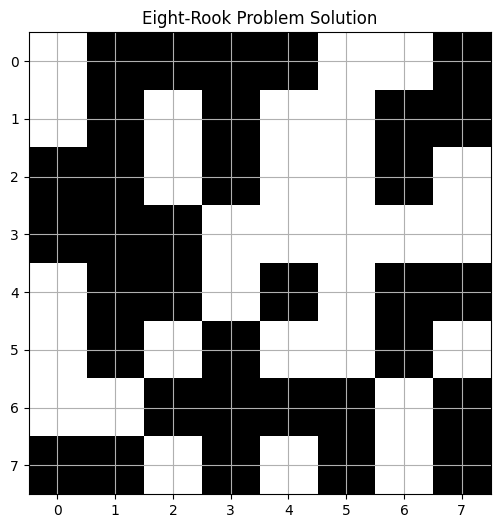

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the chessboard (8x8 for the Eight-Rook problem)
N = 8  # Number of rooks and size of the chessboard

# Energy function for the Eight-Rook problem
def energy_function(state, weights):
    energy = -0.5 * np.dot(state.T, np.dot(weights, state))
    return energy

# Initialize the Hopfield network with random states (-1 or 1)
def initialize_state(N):
    # Create a random state where each neuron has a value of -1 or 1
    state = np.random.choice([-1, 1], size=(N, N))
    return state

# Create the weight matrix for the Hopfield network
def create_weights(N):
    # Create a weight matrix that ensures one rook per row and column
    weights = np.zeros((N*N, N*N))

    # Row constraint: ensure exactly one rook per row
    for i in range(N):
        for j in range(N):
            weights[i*N + j, i*N + j] = 2  # Self-weight for each position

    # Column constraint: ensure exactly one rook per column
    for i in range(N):
        for j in range(N):
            for k in range(N):
                if j != k:
                    weights[i*N + j, i*N + k] = -1  # Penalize when two rooks share a column

    return weights

# Hopfield update rule
def hopfield_update(state, weights):
    # Update the state of the Hopfield network
    new_state = np.copy(state)
    for i in range(N):
        for j in range(N):
            neuron_index = i * N + j
            net_input = np.dot(weights[neuron_index], new_state.flatten())
            new_state[i, j] = 1 if net_input > 0 else -1  # Apply thresholding function
    return new_state

# Function to check if the network has converged
def check_convergence(state, prev_state):
    return np.array_equal(state, prev_state)

# Main function to solve the Eight-Rook problem using the Hopfield network
def solve_eight_rook():
    state = initialize_state(N)
    weights = create_weights(N)

    prev_state = np.copy(state)
    iterations = 0

    # Perform updates until convergence
    while True:
        state = hopfield_update(state, weights)
        iterations += 1
        if check_convergence(state, prev_state):
            break
        prev_state = np.copy(state)

    # Return the final configuration of the rooks
    return state, iterations

# Solve the Eight-Rook problem using Hopfield network
solution, iterations = solve_eight_rook()

# Display the final configuration of rooks
print(f"Solution found in {iterations} iterations:")
print(solution)

# Plot the solution
plt.figure(figsize=(6, 6))
plt.imshow(solution, cmap='binary', interpolation='nearest')
plt.title("Eight-Rook Problem Solution")
plt.xticks(np.arange(N))
plt.yticks(np.arange(N))
plt.grid(True)
plt.show()